Welcome to the **[30 Days of ML competition](https://www.kaggle.com/c/30-days-of-ml/overview)**!  

# Import helpful libraries

We begin by importing the libraries we'll need.  Some of them will be familiar from the **[Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)** course and the **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** course.

In [1]:
# numpy, pandas, matplot seaborn import 하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# matplot 스타일과 폰트 설정
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# matmplot을 새창이 아닌 현재 노트북에 print 
%matplotlib inline

# 데이터셋의 null data를 쉽게 보여주는 라이브러리 
import missingno as msno

# warnings 스킵 설정
import warnings
warnings.filterwarnings('ignore')


# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# For training random forest model
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


# [Data import, Dataset check]

In [2]:
# 데이터 임포트 

df_train = pd.read_csv("../input/30-days-of-ml/train.csv", low_memory=False)
df_test = pd.read_csv("../input/30-days-of-ml/test.csv", low_memory=False)

In [3]:
# train데이터 info 확인
df_train.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [4]:
# test데이터 info 확인
df_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

In [5]:
# train 데이터 상위 5개 확인
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [6]:
# test 데이터 상위 5개 확인
df_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [7]:
# df_train 차원 확인
df_train.shape

(300000, 26)

In [8]:
# df_test 차원 확인
df_test.shape

(200000, 25)

In [9]:
# train data 각 열에 null데이터가 몇 개있는지 확인하고 퍼센트로 확인

for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:         id	 Percent of NaN value: 0.00%
column:       cat0	 Percent of NaN value: 0.00%
column:       cat1	 Percent of NaN value: 0.00%
column:       cat2	 Percent of NaN value: 0.00%
column:       cat3	 Percent of NaN value: 0.00%
column:       cat4	 Percent of NaN value: 0.00%
column:       cat5	 Percent of NaN value: 0.00%
column:       cat6	 Percent of NaN value: 0.00%
column:       cat7	 Percent of NaN value: 0.00%
column:       cat8	 Percent of NaN value: 0.00%
column:       cat9	 Percent of NaN value: 0.00%
column:      cont0	 Percent of NaN value: 0.00%
column:      cont1	 Percent of NaN value: 0.00%
column:      cont2	 Percent of NaN value: 0.00%
column:      cont3	 Percent of NaN value: 0.00%
column:      cont4	 Percent of NaN value: 0.00%
column:      cont5	 Percent of NaN value: 0.00%
column:      cont6	 Percent of NaN value: 0.00%
column:      cont7	 Percent of NaN value: 0.00%
column:      cont8	 Percent of NaN value: 0.00%
column:      cont9	 Percent of NaN value

In [10]:
# test data 각 열에 null데이터가 몇 개있는지 확인하고 퍼센트로 확인

for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column:         id	 Percent of NaN value: 0.00%
column:       cat0	 Percent of NaN value: 0.00%
column:       cat1	 Percent of NaN value: 0.00%
column:       cat2	 Percent of NaN value: 0.00%
column:       cat3	 Percent of NaN value: 0.00%
column:       cat4	 Percent of NaN value: 0.00%
column:       cat5	 Percent of NaN value: 0.00%
column:       cat6	 Percent of NaN value: 0.00%
column:       cat7	 Percent of NaN value: 0.00%
column:       cat8	 Percent of NaN value: 0.00%
column:       cat9	 Percent of NaN value: 0.00%
column:      cont0	 Percent of NaN value: 0.00%
column:      cont1	 Percent of NaN value: 0.00%
column:      cont2	 Percent of NaN value: 0.00%
column:      cont3	 Percent of NaN value: 0.00%
column:      cont4	 Percent of NaN value: 0.00%
column:      cont5	 Percent of NaN value: 0.00%
column:      cont6	 Percent of NaN value: 0.00%
column:      cont7	 Percent of NaN value: 0.00%
column:      cont8	 Percent of NaN value: 0.00%
column:      cont9	 Percent of NaN value

describe의 count와 shape를 비교해서 결측값확인할 수도 있다.

<AxesSubplot:>

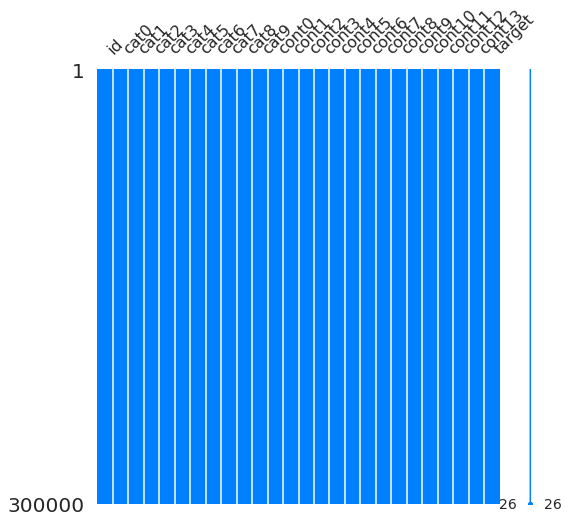

In [11]:
# msno(missing no) 라는 라이브러리로 matrix를 생성
# iloc = indexing location 이라는 뜻
# [:, :]은 처음 coulumn부터 마지막 column까지 즉 전체
# color는 rgb로 0~1값
# matrix는 어느위치에 null data가 분포하는지 알기 쉬움
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0, 0.5, 1))

<AxesSubplot:>

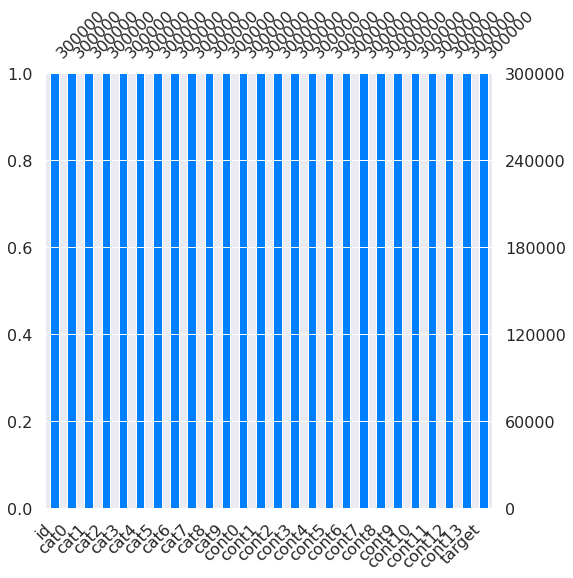

In [12]:
# bar형태는 직접적인 퍼센트를 보고싶을 때 사용
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0, 0.5, 1))

<AxesSubplot:>

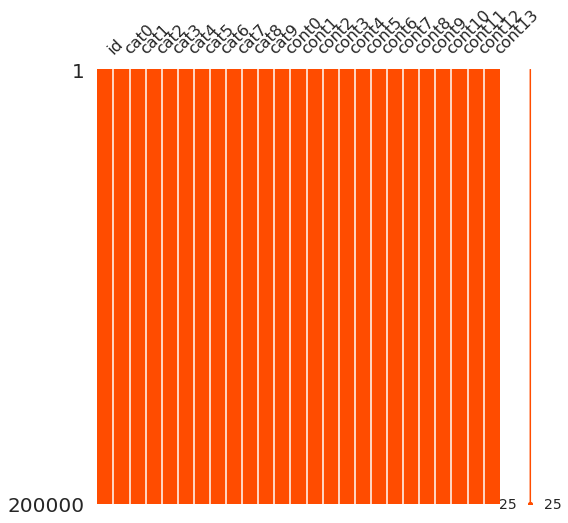

In [13]:
# test data의 null 위치 분포 확인

# missingno 라는 라이브러리를 이용해서 input에 data frame을 넘겨주고,
# matrix 형태를 만들어 주는데, 
# index location 이라는 iloc를 이용해서 원하는 위치에 있는 컬럼을 가져와서 사용할 수 있다.
# figsize는 그래프 크기이고, color는 rgb로 이루어져 있다.

msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color = (1, 0.3, 0))

<AxesSubplot:>

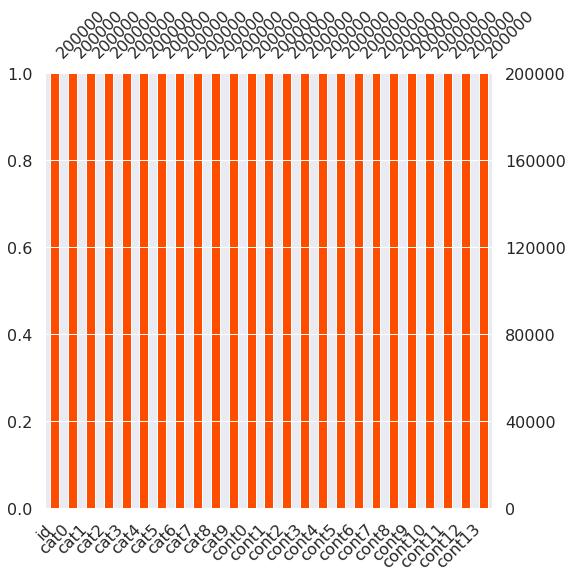

In [14]:

# test data의 null의 퍼센트 확인

# missingno 라는 라이브러리를 이용해서 input에 data frame을 넘겨주고,
# 아래와 같은 bar 형태를 만들어 준다.
# index location 이라는 iloc를 이용해서 원하는 위치에 있는 컬럼을 가져와서 사용할 수 있다.
# figsize는 그래프 크기이고, color는 rgb로 이루어져 있다.

msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color = (1, 0.3, 0))

df_train, df_test모두 결측값이 없다.

# EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

In [15]:
# 플랏에 사용할 색깔들
colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen",
          "lightseagreen", "cornflowerblue", "mediumpurple", "palevioletred",
          "lightskyblue", "sandybrown", "yellowgreen", "indianred",
          "lightsteelblue", "mediumorchid", "deepskyblue"]

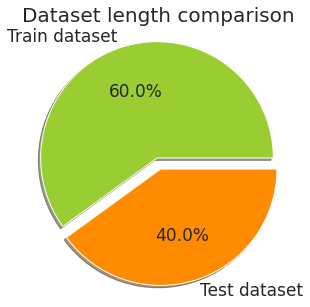

In [16]:
# 데이터셋 길이 비교
fig, ax = plt.subplots(figsize=(5, 5))
pie = ax.pie([len(df_train), len(df_test)],
            explode=[0, 0.1],
            shadow=True,
            labels=['Train dataset', 'Test dataset'],
            colors=["yellowgreen", 'darkorange'],
            textprops={"fontsize": 17},
            autopct='%1.1f%%')
ax.axis("equal")
ax.set_title("Dataset length comparison", fontsize=20)
fig.set_facecolor("white")
plt.show()

In [17]:
# df_train을 describe 메소드를 사용해서 각종 지표를 확인하는데, 
# 원하는 분위수를 출력하기 위해 (percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T 를 사용함
df_train.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
id,300000.0,250018.576947,144450.150010,1.000000,49932.900000,124772.500000,250002.500000,375226.500000,450149.100000,499999.000000
cont0,300000.0,0.527335,0.230599,-0.118039,0.254242,0.405965,0.497053,0.668060,0.871943,1.058443
cont1,300000.0,0.460926,0.214003,-0.069309,0.242940,0.310494,0.427903,0.615113,0.789630,0.887253
cont2,300000.0,0.490498,0.253346,-0.056104,0.182464,0.300604,0.502462,0.647512,0.848327,1.034704
cont3,300000.0,0.496689,0.219199,0.130676,0.219944,0.329783,0.465026,0.664451,0.796854,1.039560
cont4,300000.0,0.491654,0.240074,0.255908,0.276352,0.284188,0.390470,0.696599,0.876275,1.055424
cont5,300000.0,0.510526,0.228232,0.045915,0.251022,0.354141,0.488865,0.669625,0.828467,1.067649
cont6,300000.0,0.467476,0.210331,-0.224689,0.245036,0.342873,0.429383,0.573383,0.766758,1.111552
cont7,300000.0,0.537119,0.218140,0.203763,0.284645,0.355825,0.504661,0.703441,0.868613,1.032837
cont8,300000.0,0.498456,0.239920,-0.260275,0.264466,0.332486,0.439151,0.606056,0.909264,1.040229


target destribution을 확인해 보자.

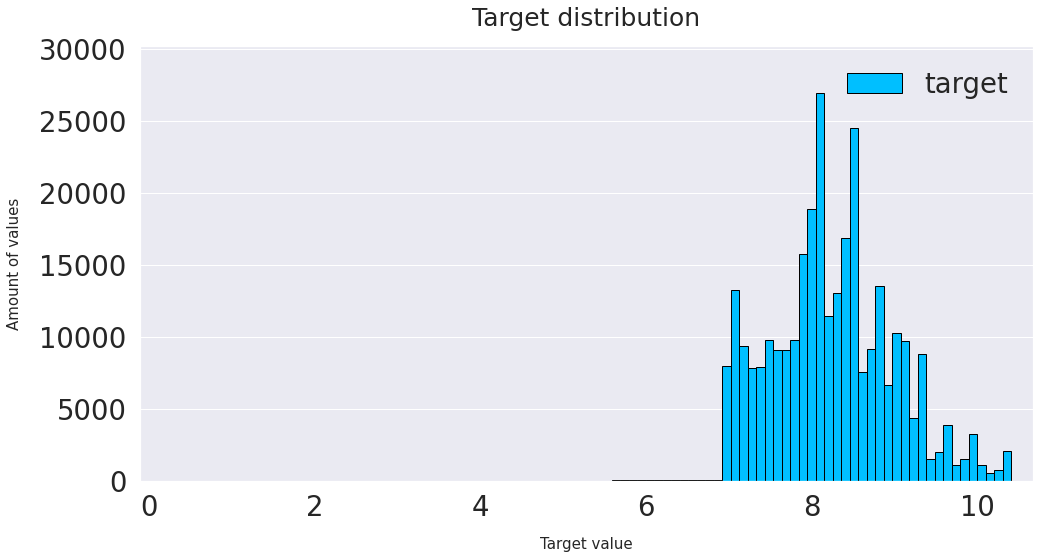

In [18]:
# target destribution 확인하기

fig, ax = plt.subplots(figsize=(16, 8))

bars = ax.hist(df_train["target"],
              bins=100,
              color = 'deepskyblue',
              edgecolor = "black")
ax.set_title("Target distribution", fontsize = 25, pad = 20)
ax.set_ylabel("Amount of values", fontsize=15, labelpad=17)
ax.set_xlabel("Target value", fontsize=15, labelpad=15)
ax.margins(0.025, 0.12)
ax.grid(axis="x")
plt.legend(['target'])

plt.show()

In [19]:
# target의 value가 5 미만인 비율 확인
print(f"{(df_train['target'] < 5).sum() / len(df_train) * 100:.3f}% of the target values are less than 5")

0.059% of the target values are less than 5


All of the feature columns, cat0 - cat9 are categorical, and the feature columns cont0 - cont13 are continuous.
The dataset contains categorical and numerical values. Let's see values distribution for these categories.

In [20]:
# 카테고리, 수치형 피쳐 열 목록
# Lists of categorical and numerical feature columns
cat_features = ["cat" + str(i) for i in range(10)]
num_features = ["cont" + str(i) for i in range(14)]

In [21]:
# 카테고리형은 cat0~cat9 (10개)
cat_features

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

In [22]:
# 수치형은 cont0~cont13 (14개)
num_features

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13']

In [23]:
# 수치형 피쳐만을 포함하는 데이터 프레임 (train, test 결합)
df = pd.concat([df_train[num_features], df_test[num_features]], axis=0)
columns = df.columns.values

In [24]:
# 모든 피쳐의 플랏들을 표시하는데 필요한 도화지 행 수 계산
cols = 3
rows = len(columns)//cols+1

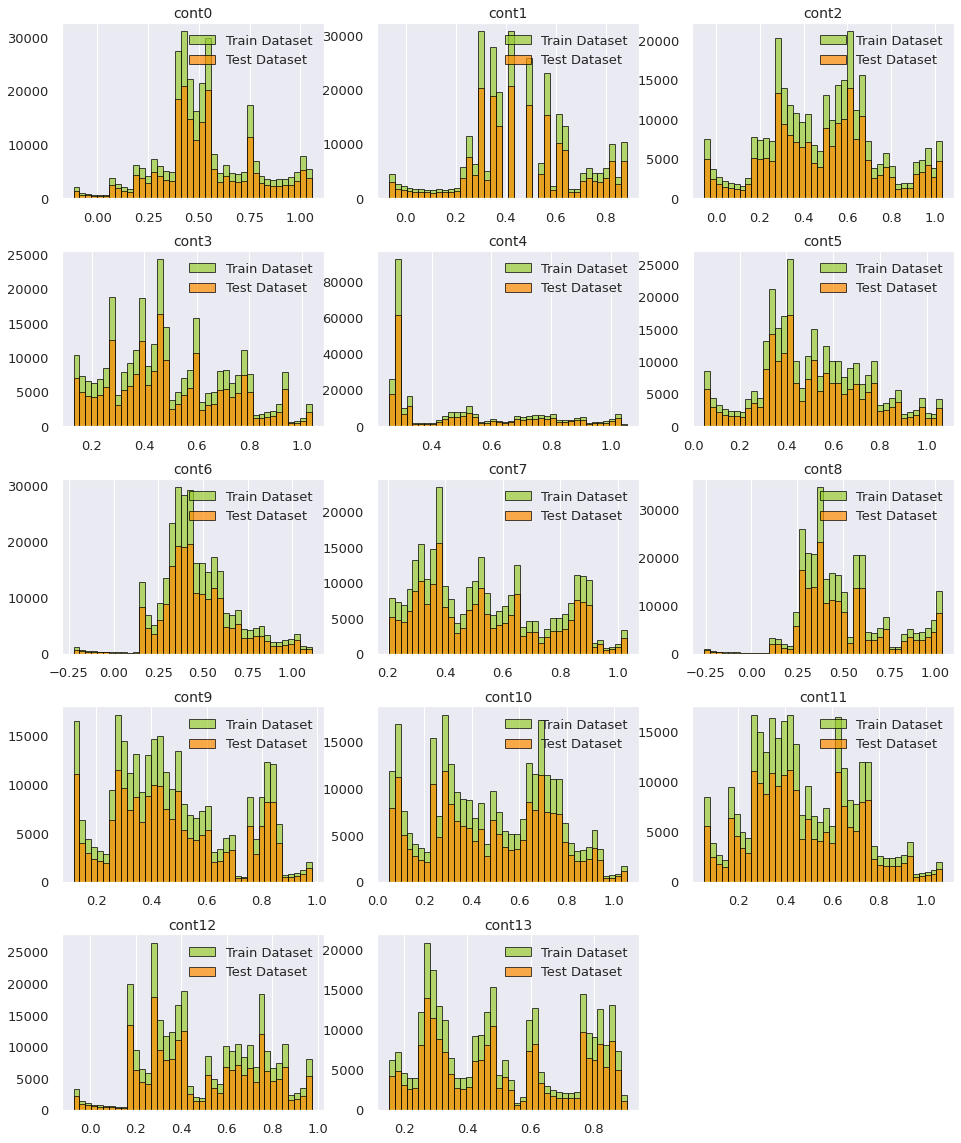

In [25]:
# 수치형 피쳐 살펴볼 플랏그리기
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(16,20), sharex=False)

# 플랏사이 간격 설정
plt.subplots_adjust(hspace = 0.3)

# 플랏
i = 0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns): #플랏을 만들 데이터 column이 더이상 없는 경우
            axs[r, c].set_visible(False) #깨끗한 배경이 되도록 축을 숨김
        else:
            #df_train data 히스토그램
            hist1 = axs[r, c].hist(df_train[columns[i]].values,
                                  range=(df[columns[i]].min(),
                                         df[columns[i]].max()),
                                  bins=40,
                                  color = "yellowgreen",
                                  edgecolor="black",
                                  alpha=0.7,
                                  label="Train Dataset")
            #df_test data 히스토그램
            hist2 = axs[r, c].hist(df_test[columns[i]].values,
                                  range=(df[columns[i]].min(),
                                         df[columns[i]].max()),
                                  bins = 40,
                                  color = 'darkorange',
                                  edgecolor = "black",
                                  alpha = 0.7,
                                  label="Test Dataset")
            axs[r, c].set_title(columns[i], fontsize=14, pad=5)
            axs[r, c].tick_params(axis="y", labelsize=13)
            axs[r, c].tick_params(axis="x", labelsize=13)
            axs[r, c].grid(axis="y")
            axs[r ,c].legend(fontsize=13)
        i+=1
# plt.suptitle("Numerical feature values distribution in both datasets", y=0.99)
plt.show()
                            
                                
                                    
            

In [26]:
# 카테고리형 피쳐만을 포함하는 데이터 프레임 (train, test 결합)
df = pd.concat([df_train[cat_features], df_test[cat_features]], axis=0)
columns = df.columns.values

In [27]:
# 모든 피쳐의 플랏들을 표시하는데 필요한 도화지 행 수 계산
cols = 3
rows = len(columns)//cols+1

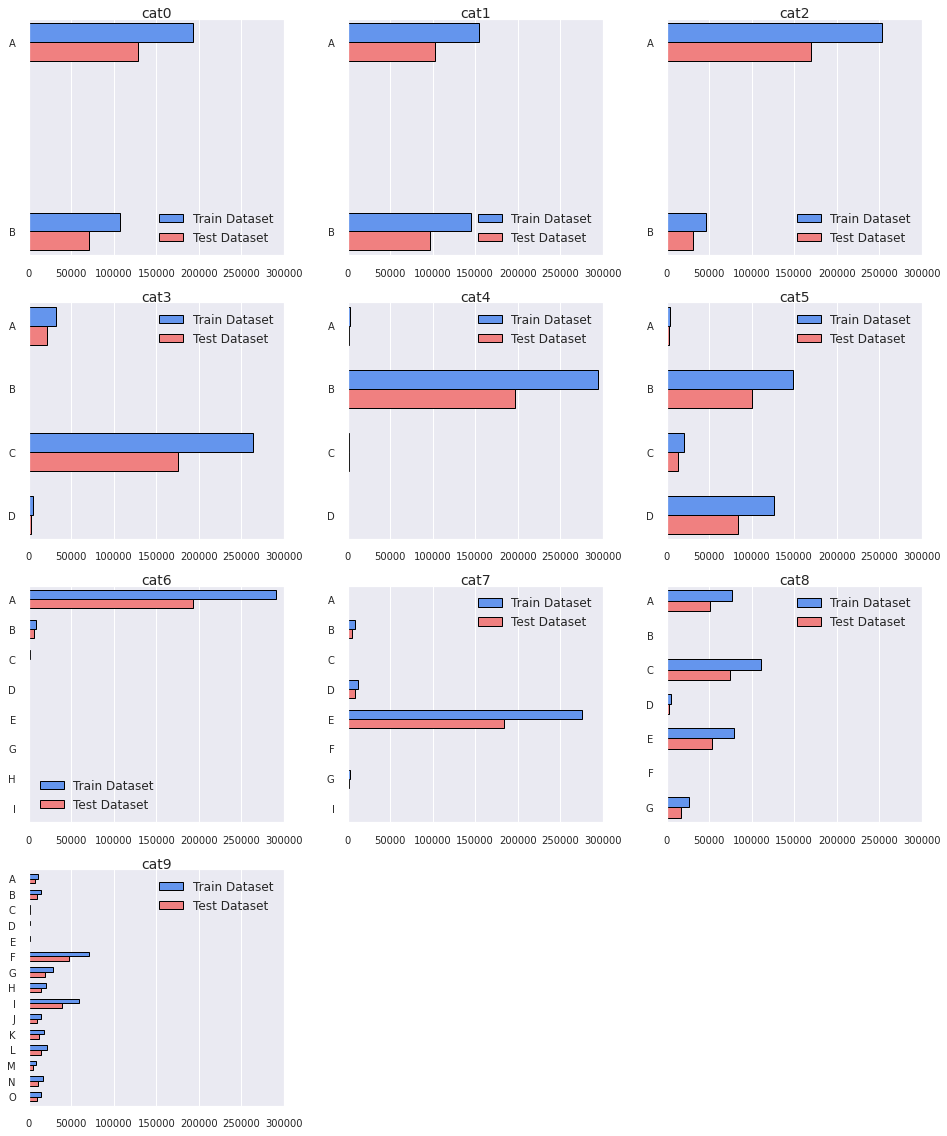

In [28]:
# 수치형 피쳐 살펴볼 플랏그리기
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(16, 20), sharex=False)

# 플랏사이 간격 설정
plt.subplots_adjust(hspace = 0.2, wspace=0.25)

# 플랏
i = 0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(cat_features): # 플랏을 만들 데이터 열이 더 이상 없는 경우
            axs[r, c].set_visible(False) #깨끗한 배경이 되도록 축을 숨김
        else:
            values = df[cat_features[i]].value_counts().sort_index(ascending=False).index
            bars_pos = np.arange(0, len(values))
            if len(values)<4:
                height=0.1
            else:
                height=0.3
            
            bars1 = axs[r, c].barh(bars_pos+height/2,
                                    [df_train[df_train[cat_features[i]]==x][cat_features[i]].count()for x in values],
                                    height = height,
                                    color = "cornflowerblue",
                                    edgecolor="black",
                                    label="Train Dataset")
            bars = axs[r, c].barh(bars_pos-height/2,
                                    [df_test[df_test[cat_features[i]]==x][cat_features[i]].count() for x in values],
                                    height = height,
                                    color = "lightcoral",
                                    edgecolor="black",
                                    label = "Test Dataset")
            y_labels = [str(x) for x in values]
            
            axs[r, c].set_title(cat_features[i], fontsize=14, pad =1)
            axs[r, c].set_xlim(0, len(df_train["id"])+50)
            axs[r, c].set_yticks(bars_pos)
            axs[r, c].set_yticklabels(y_labels)
            axs[r, c].tick_params(axis="y", labelsize=10)
            axs[r, c].tick_params(axis="x", labelsize=10)
            axs[r, c].grid(axis="y")
            axs[r, c].legend(fontsize=12)
            axs[r, c].margins(0.1, 0.02)
            
        i+=1
#plt.suptitle("Categorical feature values distribution in both datasets", y=0.99)        
plt.show()
                                     


카테고리형(범주형) 피쳐에서 데이터 셋의 카테고리 수가 다른지 확인해 보자.

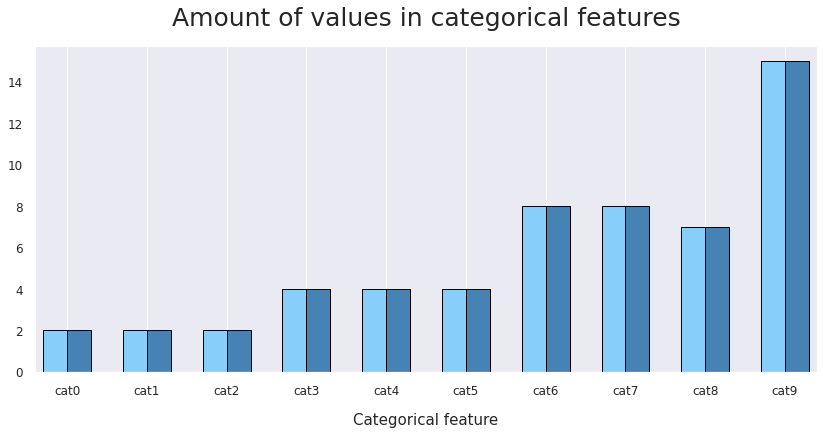

In [29]:
# 범주형 변수의 카테고리 갯수 확인용 bar형 플랏 그리기
bars_pos = np.arange(len(cat_features))

width=0.3
fig, ax = plt.subplots(figsize=(14, 6))

# 두 개의 bar객체를 만든다. 막대는 서로 붙어서 왼쪽에하나, 오른쪽에 하나 존재.
bars1 = ax.bar(bars_pos-width/2,
                 df_train[cat_features].nunique().values,
                 width=width,
                 color="lightskyblue", edgecolor="black")
bars2 = ax.bar(bars_pos+width/2,
              df_test[cat_features].nunique().values,
              width=width,
              color="steelblue", edgecolor="black")
ax.set_title("Amount of values in categorical features", fontsize=25, pad=20)
ax.set_xlabel("Categorical feature", fontsize=15, labelpad=15)
ax.set_xticks(bars_pos)
ax.set_xticklabels(cat_features, fontsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.grid(axis="y")
plt.margins(0.01, 0.05)

In [30]:
# df_train에 없는 카테고라기 df_test에 포함되어 있지 않은지 확인해보자.
for col in cat_features:
    print(set(df_train[col].value_counts().index)==set(df_test[col].value_counts().index))

True
True
True
True
True
True
True
True
True
True


확인 결과 df_train과 df_test는 balance가 잘 맞는다 라고 생각된다.


이번엔 각 피쳐들의 상관관계를 살펴보자.

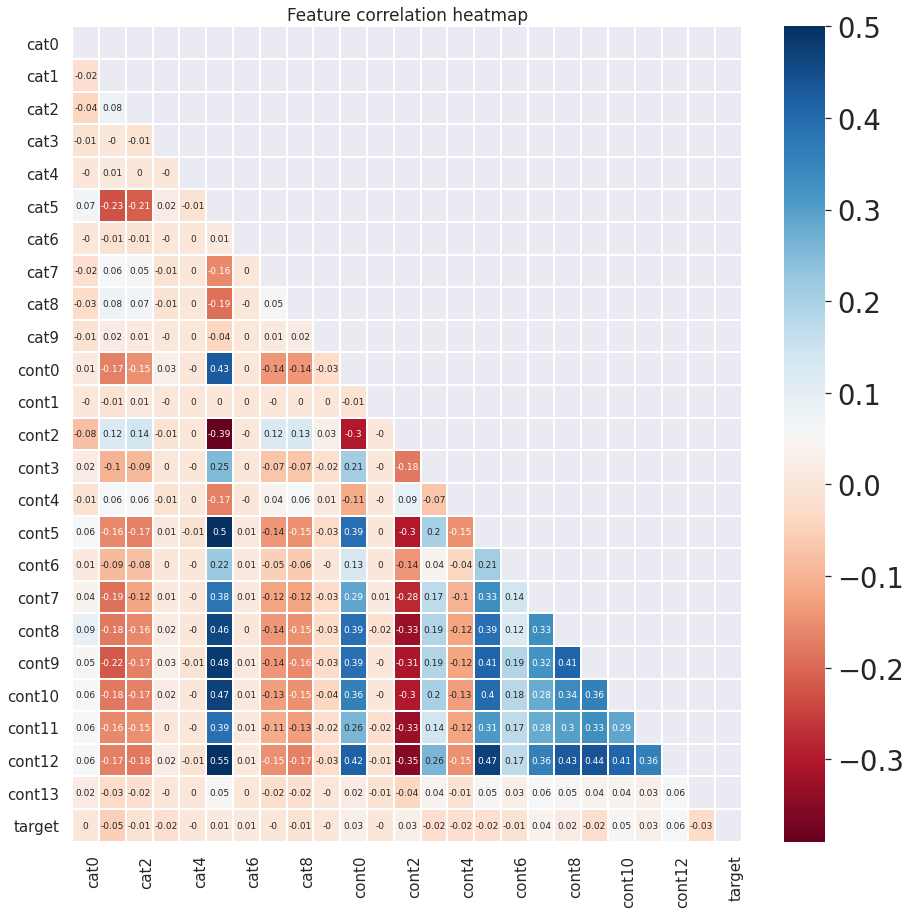

In [31]:
# df_train에서 id column drop하기
df = df_train.drop("id", axis=1)

# OrdinalEncoder로 범주형 피쳐를 인코딩하기
for col in cat_features:
    encoder = OrdinalEncoder()
    df[col] = encoder.fit_transform(np.array(df[col]).reshape(-1, 1))
    
# 상관관계 값 계산
df = df.corr().round(2)

# 사선으로 중복이므로 플랏의 오른쪽 상단부분을 숨기기 (선택사항임)
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True

# 플랏 만들기
plt.figure(figsize=(15,15))
ax = sns.heatmap(df, annot=True, mask=mask, cmap="RdBu",linewidths=0.1, linecolor='white',vmax=0.5, annot_kws={"weight":"normal", "fontsize":9})
ax.set_title("Feature correlation heatmap", fontsize=17)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15,
        rotation_mode="anchor", weight = "normal")
plt.setp(ax.get_yticklabels(), rotation=-0, ha="right",fontsize=15,
        rotation_mode="anchor", weight="normal")
plt.show()

우리가 볼 수 있듯이, target column은 모든 피쳐와 매우 약한 상관관계에 있다.

각 feature와 target을 시각화 해보자.

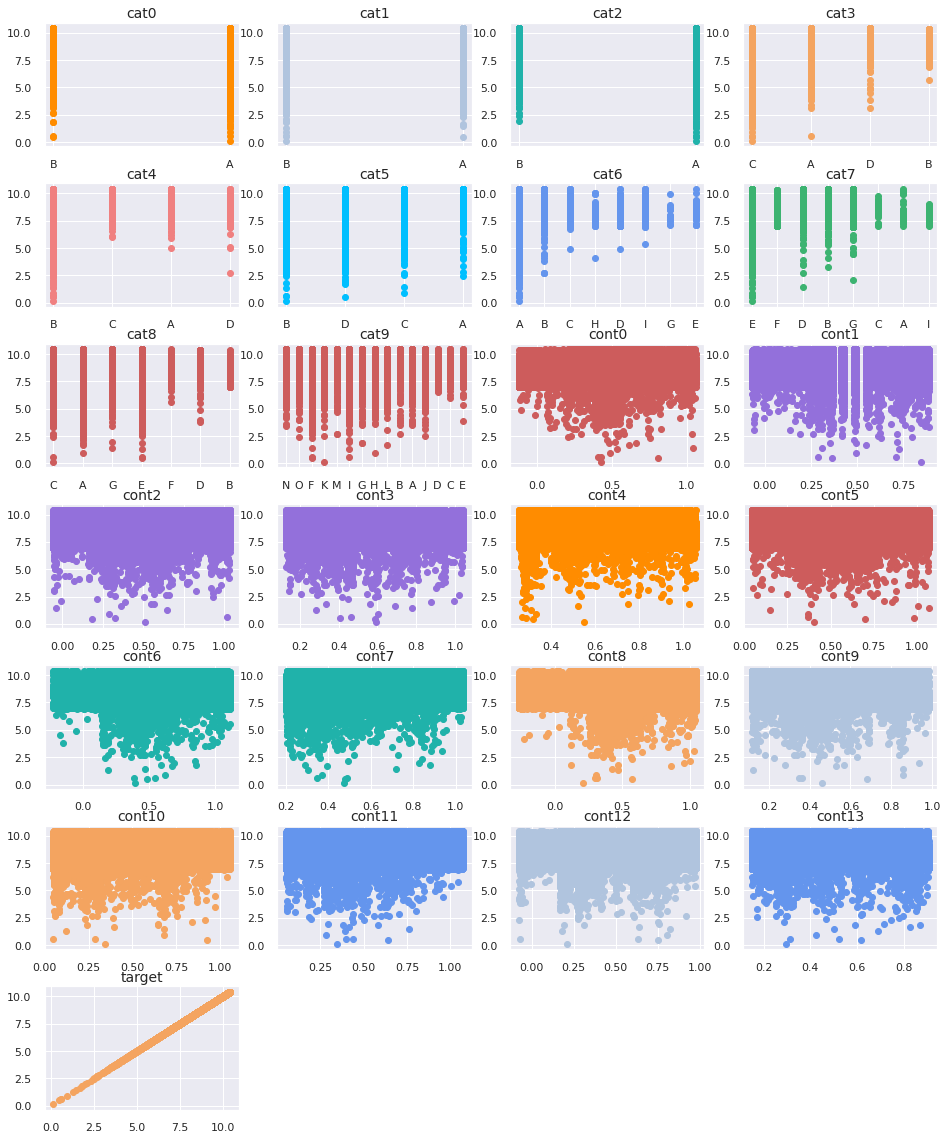

In [32]:
# 각 피쳐와 타겟 데이터 시각화
columns = df_train.drop(["id"], axis=1).columns.values

# 모든 피쳐에 대한 플랏을 표시하는데에 필요한 도화지속 행의 수 계산
cols = 4
rows = len(columns) // cols + 1

fig, axs = plt.subplots(ncols=cols, nrows = rows, figsize = (16, 20), sharex=False)

# 플랏들 사이에 간격 설정
plt.subplots_adjust(hspace=0.3)

i = 0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            scatter = axs[r, c].scatter(df_train[columns[i]].values,
                                       df_train["target"],
                                       color = random.choice(colors))
            axs[r, c].set_title(columns[i], fontsize=14, pad=5)
            axs[r, c].tick_params(axis="y", labelsize=11)
            axs[r, c].tick_params(axis="x", labelsize=11)
        
        i+=1
# plt.suptitle("Features vs target", y=0.99)
plt.show()



# Feature engineering, Data preprocessing

In [33]:
# 범주형 변수로 구성된 피쳐를 OrdinalEncoder로 인코딩한다.
for col in cat_features:
    encoder = OrdinalEncoder()
    df_train[col] = encoder.fit_transform(np.array(df_train[col]).reshape(-1, 1))
    df_test[col] = encoder.transform(np.array(df_test[col]).reshape(-1, 1))

In [34]:
# target데이터 분리
X = df_train.drop(["id", "target"], axis = 1)
X_test = df_test.drop(["id"], axis = 1)
y = df_train["target"]

In [35]:
# variance가 가장 적은 열을 삭제한다.
X.drop("cat4", axis = 1, inplace=True)
X_test.drop("cat4", axis = 1, inplace=True)

In [36]:
# cat4 삭제된 train 데이터 프레임 확인
X.head()

,cat0,cat1,cat2,cat3,cat5,cat6,cat7,cat8,cat9,cont0,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1.0,1.0,1.0,2.0,1.0,0.0,4.0,2.0,13.0,0.201470,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,1.0,1.0,0.0,0.0,3.0,0.0,5.0,0.0,14.0,0.743068,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,0.0,0.0,0.0,2.0,3.0,0.0,3.0,0.0,5.0,0.742708,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,1.0,1.0,0.0,2.0,3.0,0.0,4.0,2.0,10.0,0.429551,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,0.0,0.0,0.0,2.0,3.0,0.0,4.0,0.0,13.0,1.058291,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [37]:
# cat4 삭제된 test 데이터 프레임 확인

X_test.head()

,cat0,cat1,cat2,cat3,cat5,cat6,cat7,cat8,cat9,cont0,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1.0,1.0,1.0,2.0,1.0,0.0,4.0,4.0,8.0,0.296227,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,0.0,1.0,0.0,2.0,2.0,0.0,4.0,2.0,7.0,0.543707,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,3.0,10.0,0.408961,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,1.0,1.0,0.0,2.0,3.0,0.0,4.0,0.0,13.0,1.031239,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,1.0,1.0,0.0,2.0,2.0,0.0,4.0,2.0,5.0,0.530447,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


# Model development, Model training

In [38]:
# 모델의 하이퍼파라미터 설정
xgb_params = {'n_estimators': 10000,
             'learning_rate' : 0.35,
             'subsample' : 0.926,
             'colsample_bytree':0.84,
             'max_depth' : 5,
             'booster' : 'gbtree',
             'reg_lambda' : 20,
             'reg_alpha' : 20,
             'random_state' : 42,
             'n_jobs' : 4}

평균 제곱근 편차 (Root-mean-square deviation)

In [39]:
%%time

# fold 매개변수 설정
splits = 10
skf = KFold(n_splits=splits, shuffle=True, random_state=1)

# "out of fold" 예측을 저장하기 위한 배열 생성
oof_preds = np.zeros((X.shape[0],))
preds = 0
model_fi = 0
total_mean_rmse = 0

# 폴드 생성 및 10개의 폴드 각각에 대한 학습 및 예측
for num, (train_idx, valid_idx) in enumerate(skf.split(X)):
    X_train, X_valid = X.loc[train_idx], X.loc[valid_idx]
    y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]
    
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train,
              verbose = False,
              #이 세 가지 매개변수는 모델이 overfitting이 되기전에 학습을 중지한다.
              eval_set = [(X_train, y_train), (X_valid, y_valid)],
              eval_metric="rmse",
              early_stopping_rounds=100,
             )
    # 검정 데이터 예측 평균 얻기(ex: 분할 수로 나누기)
    preds += model.predict(X_test) / splits
    
    # 피쳐 임포턴스의 평균 얻기(분할 수로 나눈 값)
    model_fi += model.feature_importances_ / splits
    
    #validation 데이터 예측을 가져온다. 각 fold모델은 보이지 않는 데이터를 예측한다.
    #결국에는 보이지 않는 데이터 예측으로 채워진다.
    #하이퍼 파라미터 성능을 평가하는 데만 사용된다.
    oof_preds[valid_idx] = model.predict(X_valid)
    
    # fold model에 대한 점수 얻기
    fold_rmse = mean_squared_error(y_valid, oof_preds[valid_idx], squared=False)
    print(f"Fold {num} RMSE: {fold_rmse}")
    
    
    #모든 fold model의 평균 점수 얻기(분할수로 나눈 값)
    total_mean_rmse += fold_rmse / splits

    print(f"\nOverall RMSE: {total_mean_rmse}")
              

Fold 0 RMSE: 0.7171644451313998

Overall RMSE: 0.07171644451313998
Fold 1 RMSE: 0.718514137138613

Overall RMSE: 0.1435678582270013
Fold 2 RMSE: 0.7221283235773919

Overall RMSE: 0.21578069058474048
Fold 3 RMSE: 0.728845491510274

Overall RMSE: 0.28866523973576785
Fold 4 RMSE: 0.7209782681405095

Overall RMSE: 0.3607630665498188
Fold 5 RMSE: 0.7194431442889564

Overall RMSE: 0.4327073809787145
Fold 6 RMSE: 0.7184756406598939

Overall RMSE: 0.5045549450447039
Fold 7 RMSE: 0.7218714996996493

Overall RMSE: 0.5767420950146688
Fold 8 RMSE: 0.7170124992871909

Overall RMSE: 0.6484433449433878
Fold 9 RMSE: 0.7135367910417568

Overall RMSE: 0.7197970240475635
CPU times: user 1h 10min 26s, sys: 4.09 s, total: 1h 10min 30s
Wall time: 18min 34s


# Feature importances

In [40]:
# 플랏에 사용할 데이터프레임 생성
df = pd.DataFrame()
df["Feature"] = X.columns

# 학습된 모델에서 피쳐 임포턴스 추출
df["Importance"] = model_fi / model_fi.sum()

# 피쳐 임포턴스에 따라 데이터프레임 정렬
df.sort_values("Importance", axis = 0, ascending=False, inplace=True)

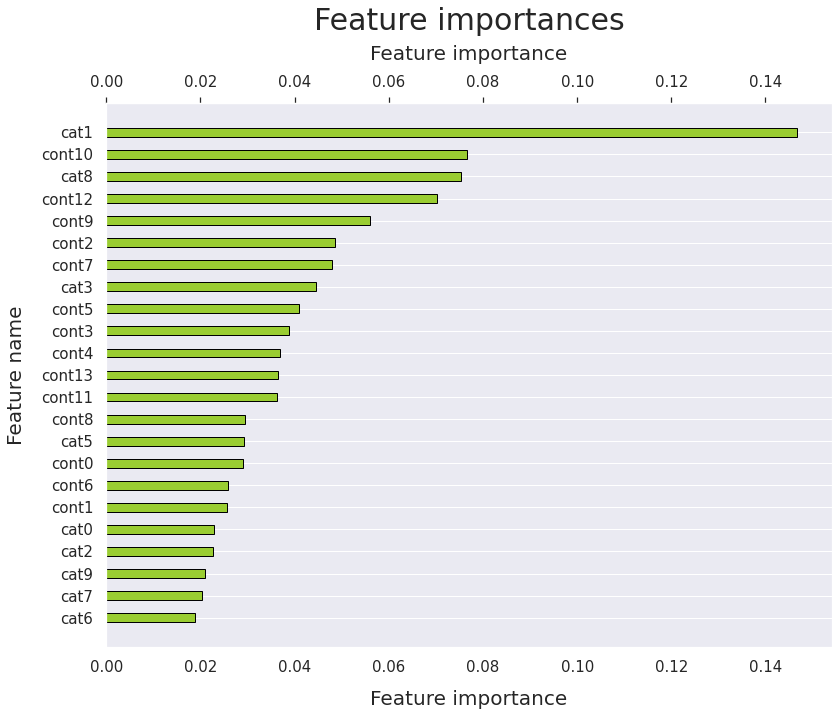

In [41]:
# 플랏 생성
fig, ax = plt.subplots(figsize=(13, 10))
bars = ax.barh(df["Feature"], df["Importance"], height = 0.4,
              color = "yellowgreen", edgecolor = "black")
ax.set_title("Feature importances", fontsize=30, pad=15)
ax.set_ylabel("Feature name", fontsize=20, labelpad=15)
ax.set_xlabel("Feature importance", fontsize=20, labelpad = 15)
ax.set_yticks(df["Feature"])
ax.set_yticklabels(df["Feature"], fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.grid(axis="x")

# 상단에 라벨 추가
ax2 = ax.secondary_xaxis('top')
ax2.set_xlabel("Feature importance", fontsize=20, labelpad=15)
ax2.tick_params(axis="x", labelsize=15)

# 값이 감소하도록 y축 방향을 반전
plt.gca().invert_yaxis()

# Predictions submission

In [42]:
predictions = pd.DataFrame()
predictions["id"] = df_test["id"]
predictions["target"] = preds

predictions.to_csv('submission.csv', index=False, header=predictions.columns)
predictions.head()

,id,target
0,0,8.008192
1,5,8.336391
2,15,8.412871
3,16,8.453893
4,17,8.126824
